First 5 rows of dataset:
  Diagnosis  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0         M      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1         M      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2         M      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3         M      11.42      20.38      77.58      386.1    0.14250    0.28390   
4         M      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   feature_6  feature_7  feature_8  ...  feature_20  feature_21  feature_22  \
0     0.3001    0.14710     0.2419  ...       25.38       17.33      184.60   
1     0.0869    0.07017     0.1812  ...       24.99       23.41      158.80   
2     0.1974    0.12790     0.2069  ...       23.57       25.53      152.50   
3     0.2414    0.10520     0.2597  ...       14.91       26.50       98.87   
4     0.1980    0.10430     0.1809  ...       22.54       16.67      152.20   

   feature_23

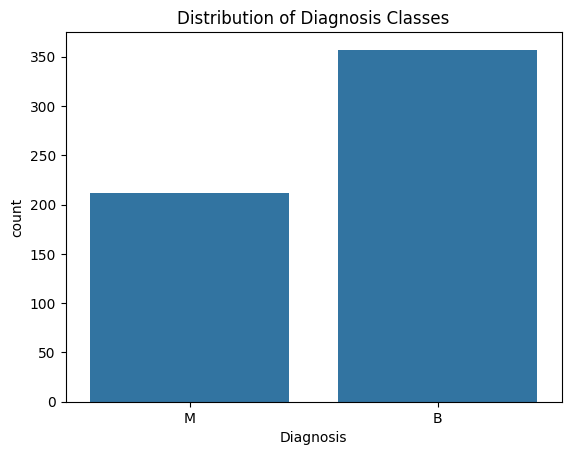


Class distribution (normalized):
Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

SVM Accuracy with Different Kernels:

SVM with kernel 'linear' Accuracy: 96.49%
SVM with kernel 'poly' Accuracy: 88.30%
SVM with kernel 'rbf' Accuracy: 96.49%
SVM with kernel 'sigmoid' Accuracy: 95.32%


SVM Hyperparameter Tuning Results:


Tuning SVM with kernel: 'linear'
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'C': 0.1, 'gamma': 0.001}
Tuned Accuracy with kernel 'linear': 98.25%
Confusion Matrix:
 [[107   0]
 [  3  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Tuning SVM with kernel: 'poly'
Fitting 5 folds for each of 16 candidates, t

In [1]:
# Breast Cancer Classification using SVM
# Data loading, preprocessing, and SVM modeling with hyperparameter tuning

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

# Assign column names
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(30)]
data.columns = columns

# Drop ID column as it is not useful
data.drop("ID", axis=1, inplace=True)

# Quick overview of the dataset
print("First 5 rows of dataset:")
print(data.head())
print("\nDataset shape:", data.shape)
print("\nDataset info:")
print(data.info())
print("\nStatistical summary of features:")
print(data.describe())

# Check for missing or duplicated values
missing_values = data.isnull().sum()
duplicate_count = data.duplicated().sum()
print("\nMissing values per column:\n", missing_values)
print("Number of duplicate rows:", duplicate_count)
print("\nData types:\n", data.dtypes)

# 2. Exploratory analysis
# Plot class distribution
sns.countplot(data=data, x="Diagnosis")
plt.title("Distribution of Diagnosis Classes")
plt.show()

# Show proportion of each class
print("\nClass distribution (normalized):")
print(data["Diagnosis"].value_counts(normalize=True))

# 3. Encode target and prepare data
# Convert 'Diagnosis' to numeric (Benign=0, Malignant=1)
data["Diagnosis"] = LabelEncoder().fit_transform(data["Diagnosis"])

# Split features and target
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

# Scale features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train SVM with different kernels
kernels_list = ["linear", "poly", "rbf", "sigmoid"]

print("\nSVM Accuracy with Different Kernels:\n")
for kernel_type in kernels_list:
    svm_model = SVC(kernel=kernel_type, random_state=42)
    svm_model.fit(X_train, y_train)
    predictions = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"SVM with kernel '{kernel_type}' Accuracy: {accuracy*100:.2f}%")

# 5. Hyperparameter tuning using GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1]
}

print("\n\nSVM Hyperparameter Tuning Results:\n")

for kernel_type in kernels_list:
    print(f"\nTuning SVM with kernel: '{kernel_type}'")

    svc_model = SVC(kernel=kernel_type, random_state=42)
    grid_search = GridSearchCV(
        estimator=svc_model,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
        verbose=1
    )

    # Fit grid search
    grid_search.fit(X_train, y_train)

    # Best model and predictions
    best_svm = grid_search.best_estimator_
    tuned_predictions = best_svm.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)

    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Tuned Accuracy with kernel '{kernel_type}': {tuned_accuracy*100:.2f}%")

    # Confusion matrix and classification report
    print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions))
    print("\nClassification Report:\n", classification_report(y_test, tuned_predictions))
